In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
import math
from math import sin as sin

In [3]:
canvas = ROOT.TCanvas()

In [4]:
#set function, make [a,b]
#(sin^6(x)+(1+x)^4)

a = -3
b = 3

def f(x,p):
    return p[0]*((sin(x[0]))**6+(1+x[0])**4)

function = ROOT.TF1('function', f, a, b, 1)
function.SetParameter(0,1)

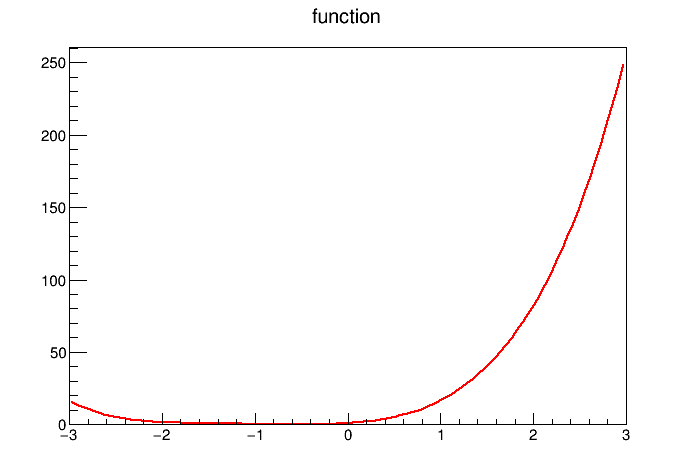

In [5]:
function.Draw()
canvas.Draw()

# Neuman method

In [6]:
M = function(b)

def doNeumanMethod(a,b):
    while True:
        r = ROOT.gRandom.Uniform(a,b)
        mu = ROOT.gRandom.Uniform(0.0, M)
        
        if mu <= function(r):
            return r
        #raise "Could never reach this point"

In [7]:
stopwatch = ROOT.TStopwatch()

In [8]:
HistNeuman = ROOT.TH1F('HistNeuman', 'Neuman method', 100, a, b)

In [9]:
stopwatch.Start()

for i in range (0, 10000):
    value = doNeumanMethod(a,b)
    HistNeuman.Fill(value)
    
stopwatch.Stop
#Timer to compare speeds
stopwatch.Print()

Real time 0:00:01, CP time 1.700


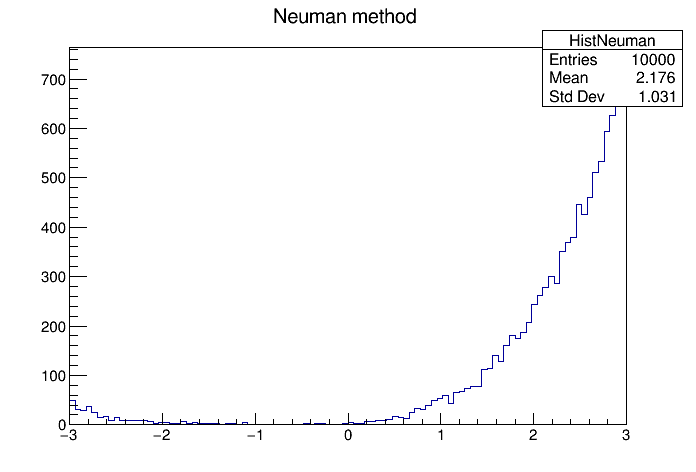

In [10]:
#histogram
HistNeuman.Draw()
canvas.Draw()

In [11]:
fit1 = HistNeuman.Fit(function, 'S')
#S -  The result of the fit is returned in the TFitResultPtr.

 FCN=81.1115 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.02574e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.79476e+00   2.80617e-02   1.24161e-04   5.10412e-06


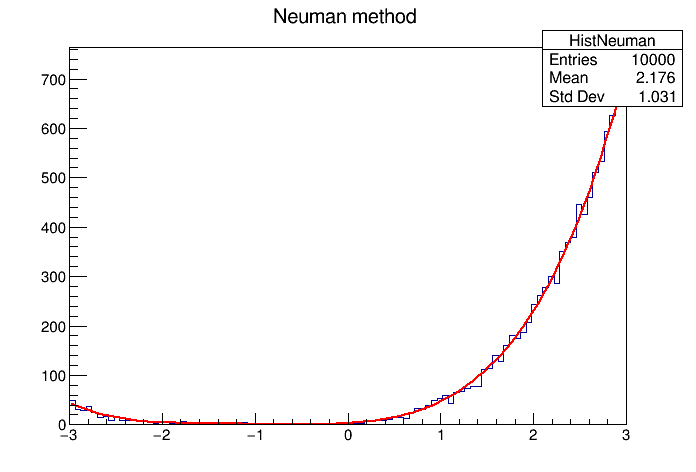

In [12]:
HistNeuman.Draw()
canvas.Draw()

In [13]:
print('Fit parameter = ', fit1.Parameter(0))

Fit parameter =  2.7947630438599083


In [14]:
print('first moment = ', HistNeuman.GetMean())
print('mean square = ', HistNeuman.GetStdDev())

first moment =  2.175579283578135
mean square =  1.0313046654501994


# Method of composition and rejection
Считаем методом неймана f1(x) = sin(x)^6

Методом прямой выборки f2(x) = (1+x)^4

In [15]:
def f1(x):
    return (sin(x))**6

#have x<0, need to do abs(модуль) or have error - complex values
def abs_and_pow(x,n):
    if x>=0:
        return pow(x,n)
    else:
        return -pow(-x,n)

с0 = (a+1)**5
с1 = (b+1)**5-(a+1)**5
    
def F2(x):
    return ((x+1)**5 - с0)/5
            
def F2rev(x):
    return (abs_and_pow(с1*x + с0, 0.2)-1)

In [16]:
#M1 = 245
M1 = f1(b)
gamma1 = F2(b)

def doCompRej(a,b,M1,gamma1,f1,F2rev):
    beta1 = M1*(b-a)/(M1*(b-a)+gamma1)
    while True:
        value = ROOT.gRandom.Uniform(0,1)
        if value > beta1:#прямая выборка
            r1 = ROOT.gRandom.Uniform(0,1)
            return F2rev(r1)
        else:#neuman
            mu = ROOT.gRandom.Uniform(0, M1)
            r2 = ROOT.gRandom.Uniform(a, b)
            if mu<f1(r2):
                return r2

In [17]:
stopwatch = ROOT.TStopwatch()

In [18]:
HistCompRej  = ROOT.TH1F("HistCompRej", "Composition and rejection method", 100, a, b)

In [19]:
stopwatch.Start()

for i in range (0, 10000):
    k = doCompRej(a,b, M1, gamma1, f1, F2rev)
    HistCompRej.Fill(k)
    
stopwatch.Stop
#Timer to compare speeds
stopwatch.Print()

Real time 0:00:00, CP time 0.220


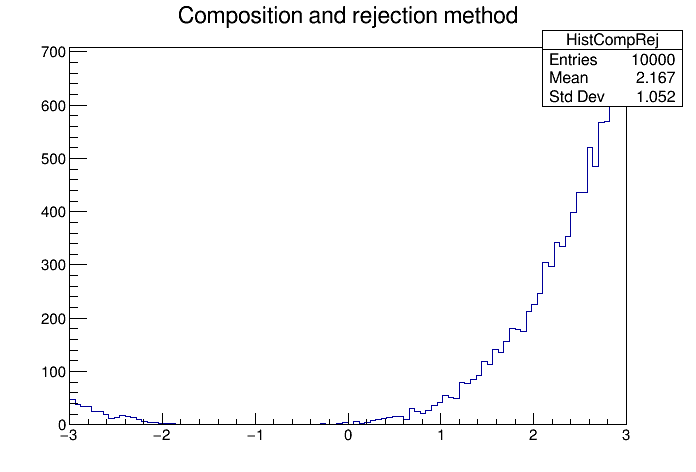

In [20]:
#histogram
HistCompRej.Draw()
canvas.Draw()

In [21]:
fitq = HistCompRej.Fit(function, 'S')
#S -  The result of the fit is returned in the TFitResultPtr.

 FCN=79.3771 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=8.90481e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.80328e+00   2.81447e-02   1.23206e-04  -1.49944e-08


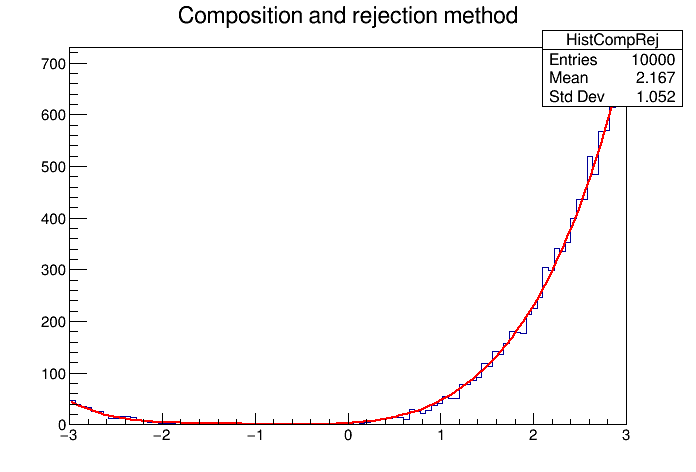

In [22]:
HistCompRej.Draw()
canvas.Draw()

In [23]:
print('first moment = ', HistCompRej.GetMean())
print('mean square = ', HistCompRej.GetStdDev())

first moment =  2.167143823493552
mean square =  1.0519570792562272


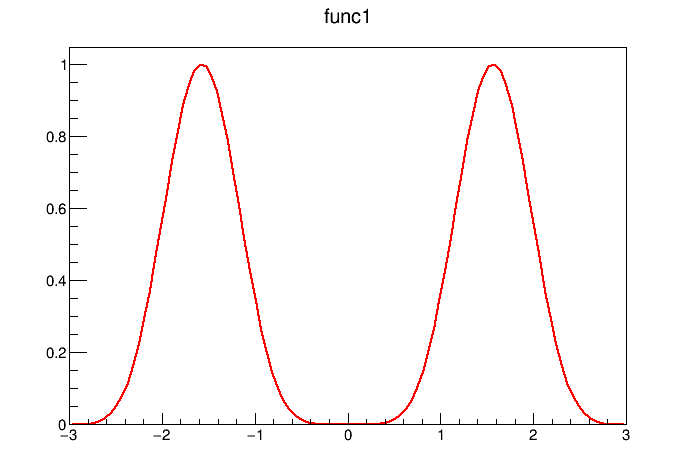

In [28]:
def f1test(x,p):
    return p[0]*((sin(x[0]))**6)

func1 = ROOT.TF1('func1',f1test, a,b, 1)
func1.SetParameter(0,1)
func1.Draw()
canvas.Draw()

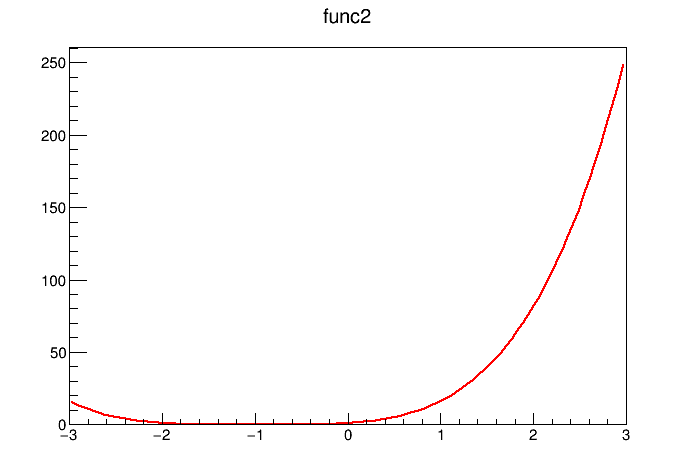

In [31]:
def f2test(x,p):
    return p[0]*((1+x[0])**4)

func2 = ROOT.TF1('func2',f2test, a, b, 1)
func2.SetParameter(0,1)
func2.Draw()
canvas.Draw()